@author: ashley hetrick  
@email: ahetrick@illinois.edu

@data pull script author: curt donelson  
@email: donelso2@illinois.edu

# Create a frequency list of keywords being discussed per top 3 most popular hashtags regarding the novel coronavirus


In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib as pyplot
import nltk
# nltk.download('stopwords')
# nltk.download('wordnet')
from nltk.probability import FreqDist
from nltk import ngrams
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from nltk.stem import WordNetLemmatizer 
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import seaborn as sns

In [2]:
#colors 
blue = sns.color_palette('Blues',10)
grey = sns.color_palette('Greys',10)
red = sns.color_palette('Reds',10)
orange = sns.color_palette('Oranges',10)

In [3]:
#functions

#take list of sentences (where each is its own element), and concatenate giant string plus space between strings
def big_string(list_of_words):
    text = ""
    for i in list_of_words:
        text += str(i) + " "
    return text

#tokenize big string (make every word an element in a list),remove non-alphanumeric chars and lower, and remove stopwords
def tokenize_no_stop(string):
    word_tokens = nltk.word_tokenize(string)
    lower_tokens = [word.lower() for word in word_tokens if word.isalpha()]
    tokens_no_stops = [word for word in lower_tokens if word not in stopwords]
    lemma_tokens = [lemmatizer.lemmatize(word) for word in tokens_no_stops]
    return lemma_tokens

#return top 10 most common words, sorted in ascending order
def most_common_sorted(tuples):
    return {i[0]:i[1] for i in sorted(tuples,key = lambda x:x[1])}

#return list of ngram tuples
def ngram(list_of_str,n):
    make_string = ' '.join(list_of_str)
    return ngrams(make_string.split(),n)

def viz_gram(t):
    return {' '.join(i[0]):i[1] for i in sorted(t,key = lambda x:x[1])}

#tokenize big string, make Text object, and then find a particular word in x surrounding words and y lines
def context(string,word,width,lines):
    word_tokens = nltk.word_tokenize(string)
    get_Text = nltk.Text(word_tokens)
    return get_Text.concordance(word,width=width,lines=lines)

def erase_axes():
    for location in ['top', 'bottom', 'left', 'right']:
        plt.gca().spines[location].set_visible(False)

In [4]:
stopwords = nltk.corpus.stopwords.words("spanish") + nltk.corpus.stopwords.words("english") + nltk.corpus.stopwords.words("portuguese") + ["rt","http","https"]
lemmatizer = WordNetLemmatizer() 

## #COVID19
### most frequent hashtag shared by Ministries of Health (14%)
#### what are the most frequent words used in tweets about #COVID19?

##### top 10 most frequent words

In [5]:
#data 
df = pd.read_csv('./crimson_data/covid19_03-27.csv')

In [6]:
most_common = FreqDist(tokenize_no_stop(big_string(df['Contents'].values))).most_common(10)

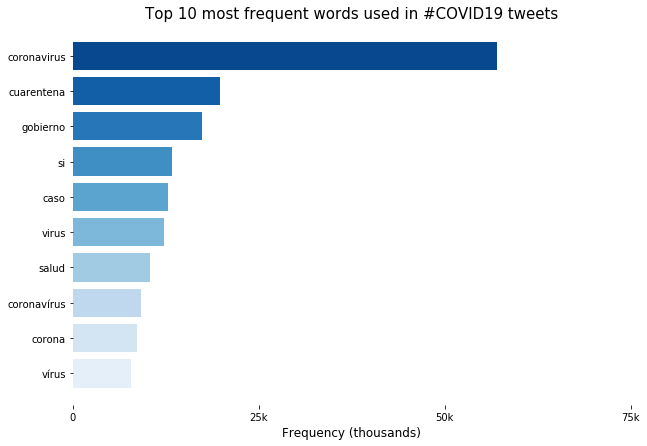

In [7]:
plt.figure(figsize = (10,7))
plt.barh(list(most_common_sorted(most_common).keys()),most_common_sorted(most_common).values(),color=blue.as_hex())
plt.xlabel('Frequency (thousands)', size = 12)
plt.xticks(np.arange(0,100000,25000), ['0', '25k', '50k', '75k','100k'])
plt.title('Top 10 most frequent words used in #COVID19 tweets', size = 15)
erase_axes()

##### top 100 most frequent words

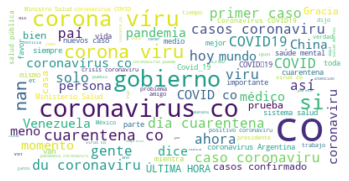

In [9]:
text = big_string(df['Contents'].values) #full string
wc = WordCloud(max_font_size=50, max_words=100,background_color='white',stopwords=stopwords).generate(text)
plt.figure()
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.show()

##### what is the context for some of these most frequent words?

In [10]:
context(big_string(df['Contents'].values),"coronavirus",100,25)

Displaying 25 of 56995 matches:
RT @ pepbernard : @ Le_Figaro L'épidémie du coronavirus risque de prendre de l'ampleur en France ce
ollahs et des pasdarans en # Iran face au # Coronavirus ne visent qu ’ à contrôler et réprimer… RT 
aux sont aux avant-postes pour contrer le # coronavirus mais # EnMem… RT @ OtassPeru : 🗓️ ¡Faltan 2
 del agua… Entre el boludo de la cuenta del coronavirus y algunos que retuitean frases racistas de 
# Internacional Confirman el cuarto caso de coronavirus en México primero en Ecuador y segundo en B
t.co/VIRIj1Pxeq RT @ _letraqueur_ : Avec le coronavirus je tiens la une une excellente raison pour 
sé un référendum et utilisant la crise du # coronavirus le gouvernement avec le cynisme que chacun 
Carina : Ik wil niemand bang maken maar het CORONAVIRUS zal zich weldra onomkeerbaar verspreiden . 
e Dengue ano passado e ninguém morreu com o Coronavirus . Muito cha… https : //t.co/95nNJ6Vaev RT @
d zijn inmiddels tien mensen besmet met het coronavirus . Dat meldde

#### what are the most frequent bigrams used in tweets about #COVID19?

In [11]:
most_common_bigrams = FreqDist(ngram(tokenize_no_stop(big_string(df['Contents'].values)),2)).most_common(10)

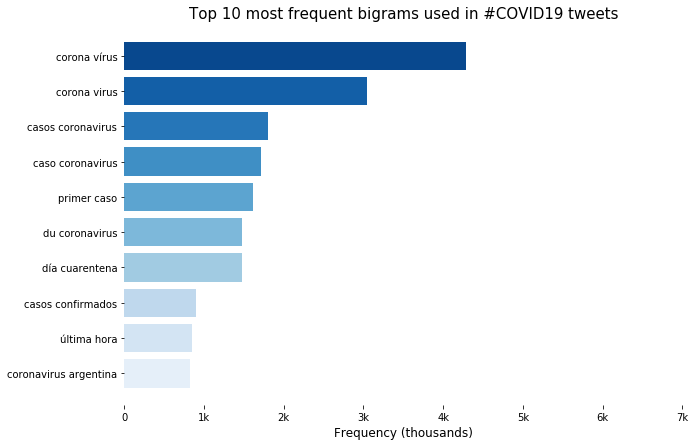

In [12]:
plt.figure(figsize = (10,7))
plt.barh(list(viz_gram(most_common_bigrams).keys()), viz_gram(most_common_bigrams).values(),color=blue.as_hex())
plt.xlabel('Frequency (thousands)', size = 12)
plt.xticks(np.arange(0,8000,1000), ['0','1k','2k','3k','4k','5k','6k','7k','8k'])
plt.title('Top 10 most frequent bigrams used in #COVID19 tweets', size = 15)
erase_axes()

#### what are the most frequent trigrams used in tweets about #COVID19?

In [13]:
most_common_trigrams = FreqDist(ngram(tokenize_no_stop(big_string(df['Contents'].values)),3)).most_common(10)

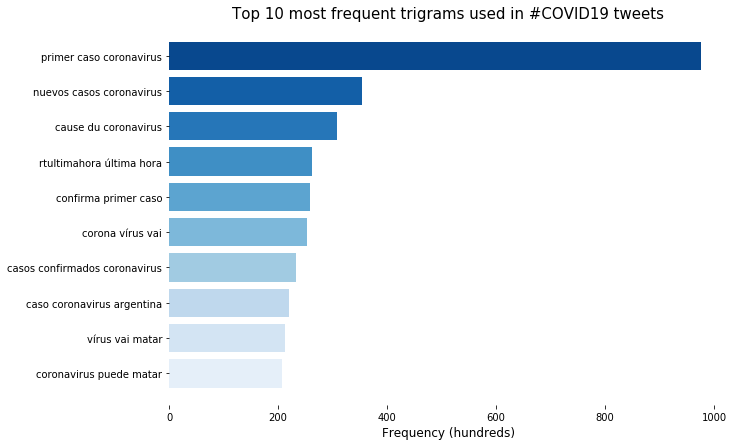

In [14]:
plt.figure(figsize = (10,7))
plt.barh(list(viz_gram(most_common_trigrams).keys()), viz_gram(most_common_trigrams).values(),color=blue.as_hex())
plt.xlabel('Frequency (hundreds)', size = 12)
plt.title('Top 10 most frequent trigrams used in #COVID19 tweets', size = 15)
erase_axes()

## #coronavirus
### second most frequent hashtag shared by Ministries of Health (4%)
#### what are the most frequent words used in tweets about #coronavirus?

In [15]:
#data 
df = pd.read_csv('./crimson_data/coronavirus.csv')

In [16]:
most_common = FreqDist(tokenize_no_stop(big_string(df['Contents'].values))).most_common(10)

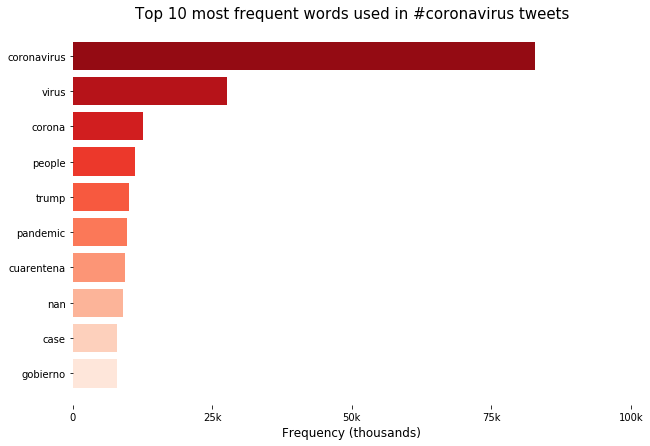

In [17]:
plt.figure(figsize = (10,7))
plt.barh(list(most_common_sorted(most_common).keys()),most_common_sorted(most_common).values(),color=red.as_hex())
plt.xlabel('Frequency (thousands)', size = 12)
plt.xticks([0, 25000, 50000, 75000, 100000], ['0', '25k', '50k', '75k','100k'])
plt.title('Top 10 most frequent words used in #coronavirus tweets', size = 15)
erase_axes()

##### top 100 most frequent words

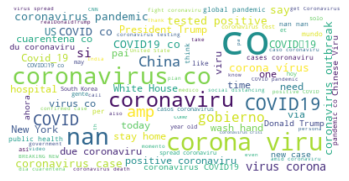

In [18]:
text = big_string(df['Contents'].values) #full string
wc = WordCloud(max_font_size=50, max_words=100,background_color='white',stopwords=stopwords).generate(text)
plt.figure()
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.show()

#### what are the most frequent bigrams used in tweets about #coronavirus?

In [19]:
most_common_bigrams = FreqDist(ngram(tokenize_no_stop(big_string(df['Contents'].values)),2)).most_common(10)

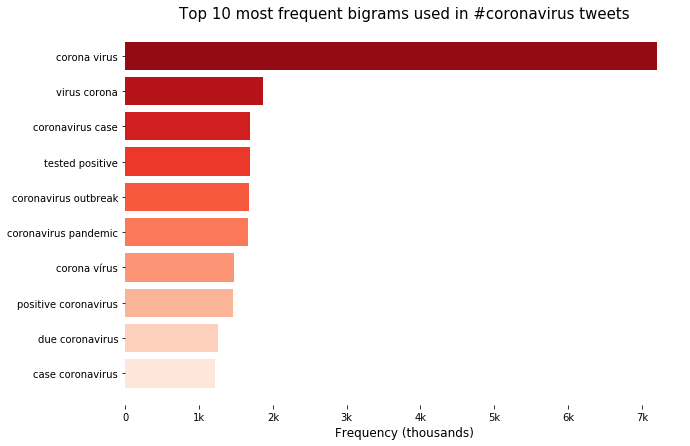

In [20]:
plt.figure(figsize = (10,7))
plt.barh(list(viz_gram(most_common_bigrams).keys()), viz_gram(most_common_bigrams).values(),color=red.as_hex())
plt.xlabel('Frequency (thousands)', size = 12)
plt.xticks(np.arange(0,8000,1000), ['0','1k','2k','3k','4k','5k','6k','7k','8k'])
plt.title('Top 10 most frequent bigrams used in #coronavirus tweets', size = 15)
erase_axes()

#### what are the most frequent trigrams used in tweets about #coronavirus?

In [21]:
most_common_trigrams = FreqDist(ngram(tokenize_no_stop(big_string(df['Contents'].values)),3)).most_common(10)

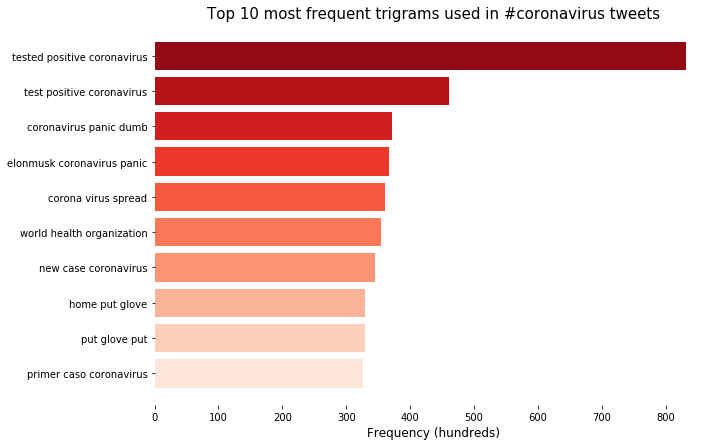

In [22]:
plt.figure(figsize = (10,7))
plt.barh(list(viz_gram(most_common_trigrams).keys()), viz_gram(most_common_trigrams).values(),color=red.as_hex())
plt.xlabel('Frequency (hundreds)', size = 12)
plt.title('Top 10 most frequent trigrams used in #coronavirus tweets', size = 15)
erase_axes()

## #COVID_19
### third most frequent hashtag shared by Ministries of Health (4%)
#### what are the most frequent words used in tweets about #COVID_19?

In [23]:
#data 
df = pd.read_csv('./crimson_data/covid_19.csv')

In [24]:
most_common = FreqDist(tokenize_no_stop(big_string(df['Contents'].values))).most_common(10)

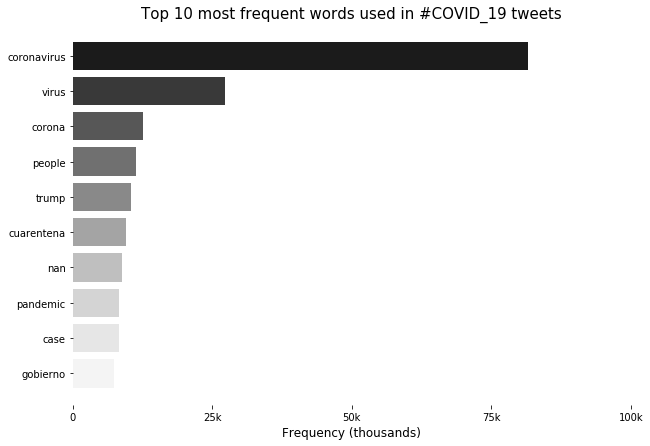

In [25]:
plt.figure(figsize = (10,7))
plt.barh(list(most_common_sorted(most_common).keys()),most_common_sorted(most_common).values(),color=grey.as_hex())
plt.xlabel('Frequency (thousands)', size = 12)
plt.xticks([0, 25000, 50000, 75000, 100000], ['0', '25k', '50k', '75k','100k'])
plt.title('Top 10 most frequent words used in #COVID_19 tweets', size = 15)
erase_axes()

##### top 100 most frequent words

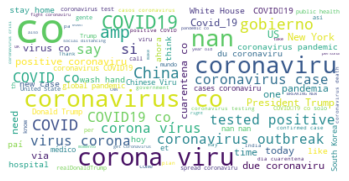

In [26]:
text = big_string(df['Contents'].values) #full string
wc = WordCloud(max_font_size=50, max_words=100,background_color='white',stopwords=stopwords).generate(text)
plt.figure()
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.show()

#### what are the most frequent bigrams used in tweets about #COVID_19?

In [27]:
most_common_bigrams = FreqDist(ngram(tokenize_no_stop(big_string(df['Contents'].values)),2)).most_common(10)

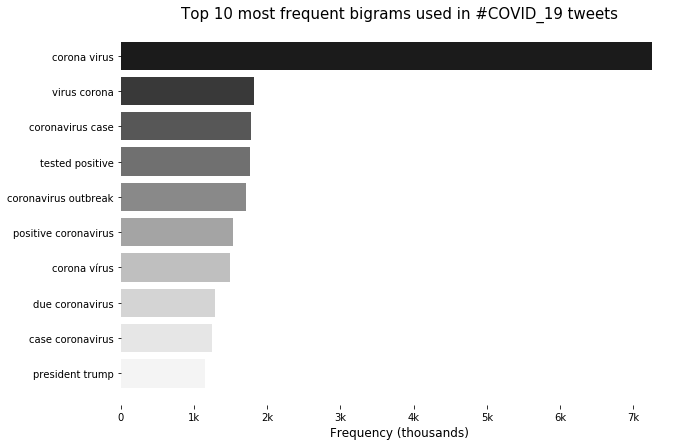

In [28]:
plt.figure(figsize = (10,7))
plt.barh(list(viz_gram(most_common_bigrams).keys()), viz_gram(most_common_bigrams).values(),color=grey.as_hex())
plt.xlabel('Frequency (thousands)', size = 12)
plt.xticks(np.arange(0,8000,1000), ['0','1k','2k','3k','4k','5k','6k','7k','8k'])
plt.title('Top 10 most frequent bigrams used in #COVID_19 tweets', size = 15)
erase_axes()

#### what are the most frequent trigrams used in tweets about #COVID_19?

In [29]:
most_common_trigrams = FreqDist(ngram(tokenize_no_stop(big_string(df['Contents'].values)),3)).most_common(10)

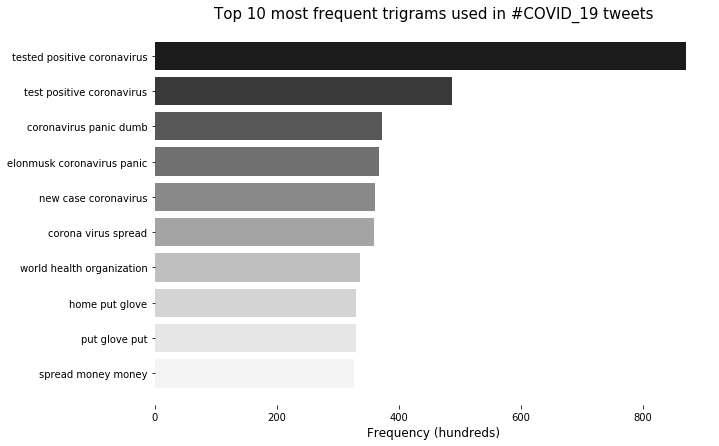

In [30]:
plt.figure(figsize = (10,7))
plt.barh(list(viz_gram(most_common_trigrams).keys()), viz_gram(most_common_trigrams).values(),color=grey.as_hex())
plt.xlabel('Frequency (hundreds)', size = 12)
plt.title('Top 10 most frequent trigrams used in #COVID_19 tweets', size = 15)
erase_axes()

## Results

There is a great deal of overlap between the datasets produced by these three hastags. Across the data, we can see a high interest in sharing information as it becomes available ("rt" and "http"), a willingness to move between different ways of talking about the novel coronavirus ("coronavirus", "virus"), and a high interest in both the global spread of the virus and its relationship to particular areas of the world ("Venezuela", "China", "New York").